# Heart Disease

> Write your abstract here...

End it with a prologue into the model/solution you're building to solve this problem.

In [1]:
# Copyright 2021 Victor I. Afolabi
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from heart_disease import train
from heart_disease.config import FS
from heart_disease.data import Data
from heart_disease.models import Models

# Set Seaborn style
sns.set_style('whitegrid')

# Matplotlib display inline
%matplotlib inline

In [2]:
# Arguments.
model_dir = FS.SAVED_MODELS  # Path where our model is saved.
train_all_models = True      # We want to train all the availble models
filename = f'{FS.DATA_DIR}/heart.csv'   # Path to our dataset
test_size = 0.2              # Give us 20% of our entire data as test set, 80% as training set...

# Dataset

## Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content

## Column Descriptions:

`id` (Unique id for each patient)

1. `age` (Age of the patient in years)
1. `sex` (Male/Female)
1. `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
1. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
1. `chol` (serum cholesterol in mg/dl)
1. `fbs` (if fasting blood sugar > 120 mg/dl)
1. `restecg` (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
1. `thalach`: maximum heart rate achieved
1. `exang`: exercise-induced angina (True/ False)
1. `oldpeak`: ST depression induced by exercise relative to rest
1. `slope`: the slope of the peak exercise ST segment
1. `ca`: number of major vessels (0-3) colored by fluoroscopy
1. `thal`: [normal; fixed defect; reversible defect]
1. `target`: the predicted attribute

## Understanding the dataset

In [3]:
# Load our data.
data = Data(filename=filename)
data

Data(filename=/Users/victor/dev/heart-disease/data/heart.csv)

In [4]:
# Get our pandas DataFrame object.
df = data.df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Get the information about the data (dataframe).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Describe our data statistics...
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Missing values - For each column, count all missing values..
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Visualization

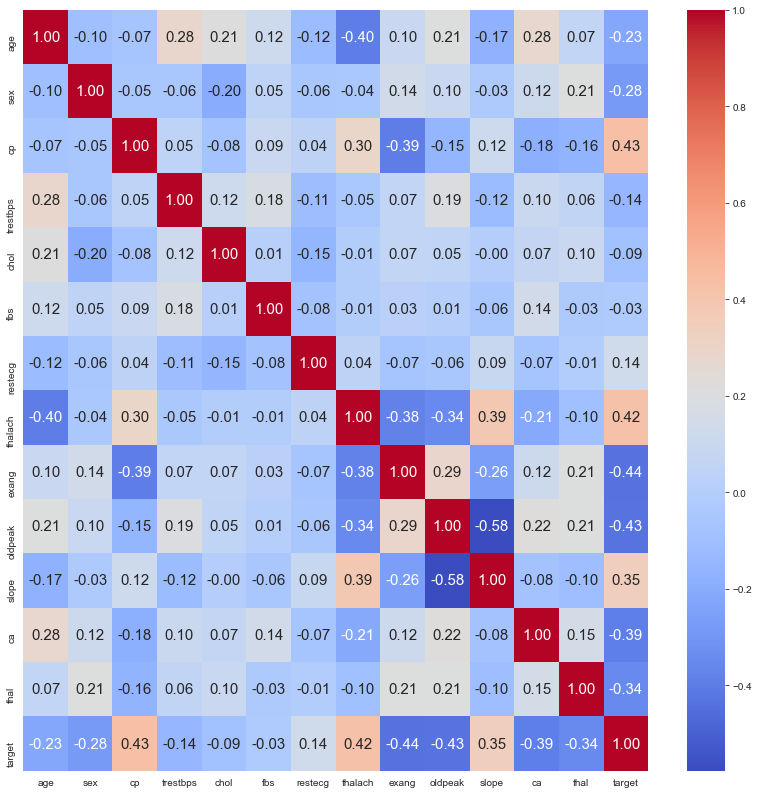

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [8]:
# Dataset heatmap
corr = df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f',
            annot_kws={'size': 15}, cmap='coolwarm')
plt.show()

print(corr)

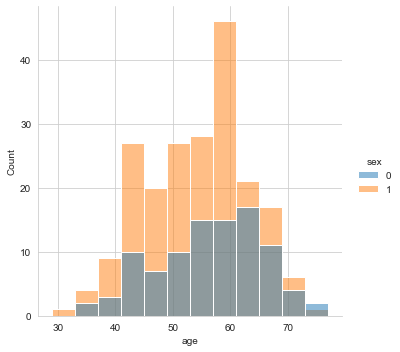

In [9]:
# Age & sex distribution plot.
sns.displot(x='age', data=df, hue='sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

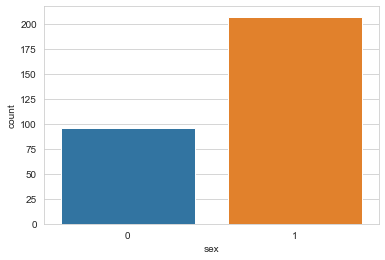

In [10]:
# Male vs. Female count
sns.countplot(x='sex', label='Count', data=df)

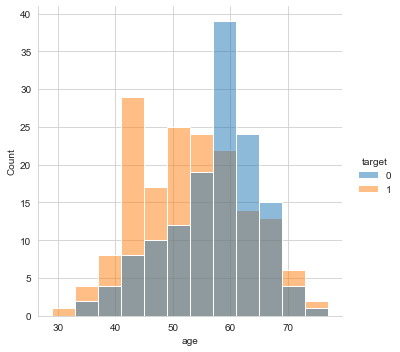

In [11]:
# Age vs. target (0 for no heart disease/1 for heart disease)
sns.displot(x='age', data=df, hue='target')

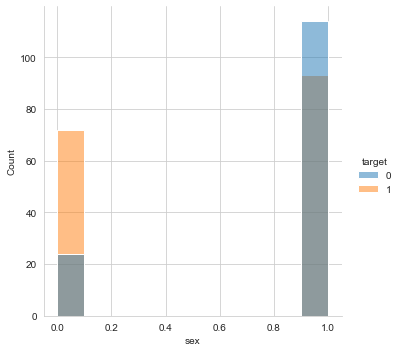

In [12]:
sns.displot(x='sex', data=df, hue='target')

<AxesSubplot:xlabel='ca', ylabel='trestbps'>

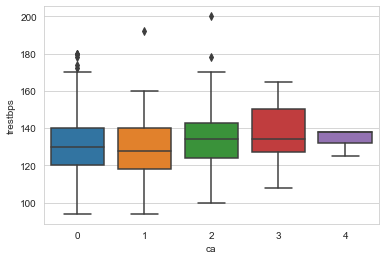

In [13]:
# Resting blood pressure vs. number of major vessels
sns.boxplot(data=df, x='ca', y='trestbps')

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

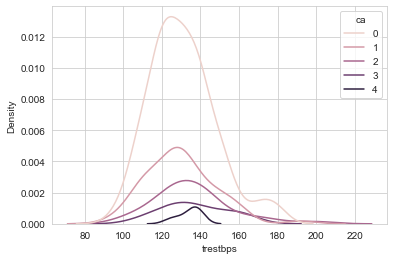

In [14]:
# Desity of Resting blood vessel vs. number of major vessels
sns.kdeplot(data=df, x='trestbps', hue='ca')

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

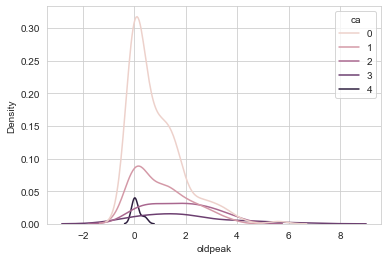

In [15]:
sns.kdeplot(data=df, x='oldpeak', hue='ca')

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

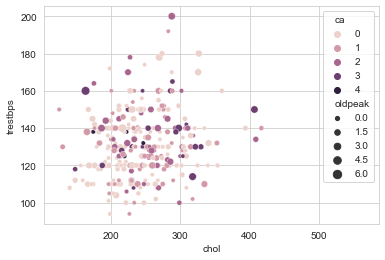

In [16]:
sns.scatterplot(x='chol', y='trestbps', data=df, hue='ca', size='oldpeak')

<AxesSubplot:xlabel='age', ylabel='chol'>

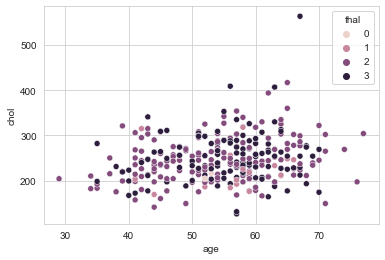

In [17]:
sns.scatterplot(y='chol', x='age', data=df, hue='thal')

<AxesSubplot:xlabel='age', ylabel='chol'>

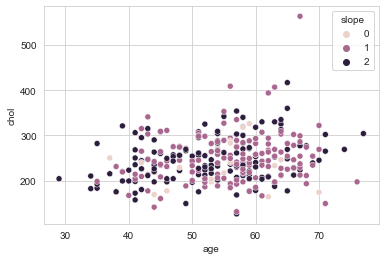

In [18]:
sns.scatterplot(y='chol', x='age', data=df, hue='slope')

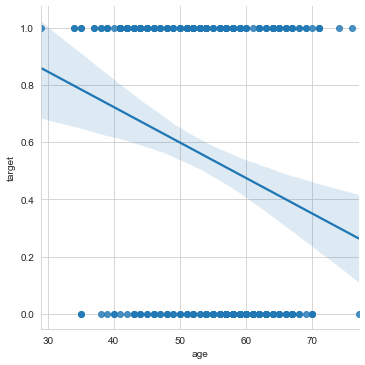

In [19]:
sns.lmplot(x='age', y='target', data=df)

In [20]:
pd.crosstab(df['cp'],df['ca'])

ca,0,1,2,3,4
cp,,,,,
0,65,34,29,14,1
1,37,8,3,1,1
2,57,20,2,5,3
3,16,3,4,0,0


In [21]:
# Data columns.
data.columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [22]:
# Feature names
data.feature_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [23]:
# Predict value name
data.target_name

'target'

In [24]:
# Class names
data.class_names

['No Heart disease', 'Has Heart disease']

In [25]:
# Features shape
data.features.shape

(303, 13)

In [26]:
# Target shape
data.target.shape

(303,)

In [27]:
# Number of classes
data.n_classes

2

In [28]:
# Number of samples
data.n_samples

303

## Train Model(s)

In [29]:
# Train all models at once or a single model.
if train_all_models:
    # Train all models.
    train.train_all(
        filename=filename,
        test_size=test_size
    )
else:
    
    # Train selected model.
    train.train_model(
        model_name=Models.SVM.name,
        filename=filename,
        test_size=test_size
    )

print('✨Done.')

✨Done.


In [30]:
# Load data.
data = Data(filename)
print(data)

# Split into train & test set.
(X_train, y_train), (X_test, y_test) = data.train_test_split(test_size=test_size)

# Training set                     # Testing set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

Data(/Users/victor/dev/heart-disease/data/heart.csv)


(((242, 13), (242,)), ((61, 13), (61,)))

In [31]:
# KNN class
# Models.KNN.type


# Initialized KNN model
model = Models.KNN.model

# Returns K-Nearest Neighbors
# Models.KNN.name

# List of available model classes
# Models.types()

# List of available models
Models.names()

['Support Vector Machine',
 'K-Nearest Neighbors',
 'Naive Bayes',
 'Decision Tree']

In [32]:
# Train the selected model with test set
model.train(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Make prediction with new data.
input_data = (63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1)

#change input tuple to a numpy array
input_data = np.asarray(input_data)

#reshape numpy array as we predict on one instance 
input_data_reshaped= input_data.reshape(1, -1)

for model in Models.types():
    model = model()
    model.load_model()

    # Make prediction
    result = model(input_data_reshaped)

    # Interpret the result.
    prediction = np.array(['Has no heart disease',
                           'Has heart disease'])[
        np.cast[int](result['prediction'])
    ]

    try:
        # Print the result:
        print(f'{model.name} predicts: {prediction[0]}', end='')
        confidence = np.max(result['confidence'])
        print(f' with {confidence:.2%} confidence.', end='')
    except Exception as e:
        pass
    print()


INFO     | Model loaded from /Users/victor/dev/heart-disease/data/trained_model/Support Vector Machine.joblib
ERROR    | predict_proba is not available when  probability=False
Traceback (most recent call last):
  File "/Users/victor/dev/heart-disease/heart_disease/base.py", line 208, in predict_probability
    return self._model.predict_proba(inputs)
  File "/Users/victor/dev/heart-disease/venv/lib/python3.9/site-packages/sklearn/svm/_base.py", line 666, in predict_proba
    self._check_proba()
  File "/Users/victor/dev/heart-disease/venv/lib/python3.9/site-packages/sklearn/svm/_base.py", line 633, in _check_proba
    raise AttributeError("predict_proba is not available when "
AttributeError: predict_proba is not available when  probability=False
INFO     | Model loaded from /Users/victor/dev/heart-disease/data/trained_model/K-Nearest Neighbors.joblib
INFO     | Model loaded from /Users/victor/dev/heart-disease/data/trained_model/Naive Bayes.joblib
INFO     | Model loaded from /Users/v

Support Vector Machine predicts: Has heart disease
K-Nearest Neighbors predicts: Has heart disease with 60.00% confidence.
Naive Bayes predicts: Has no heart disease with 89.95% confidence.
Decision Tree predicts: Has heart disease with 100.00% confidence.


In [34]:
# Make some prediction
model(X_test)

{'prediction': array([0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 1., 1.], dtype=float32),
 'confidence': array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 

In [35]:
# Model accuracy on test set
acc = model.test(X_test, y_test)

print(f'{model.name}\'s is accuracy = {acc:.2%}')

Decision Tree's is accuracy = 95.08%


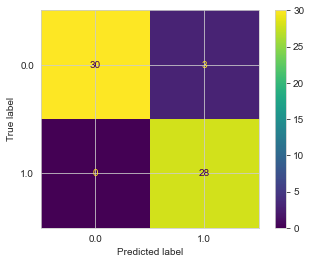

In [36]:
# Confusion matrix
cm = model.metrics(X_test, y_test)
plt.show()

## Interpret the result

In [37]:
result = model(X_test)

In [38]:
pred = result['prediction']
confidence = result['confidence']

In [39]:
# True - represents has heart disease while;
# False - has no heart disease
p = np.cast[bool](pred)

In [40]:
# Convert confidence to (%)
if confidence is not None:
    confidence = np.max(confidence, axis=1)

c = confidence * 100

In [41]:
# True (Has heart disease)
# False (Has no heart disease)
r = zip(p, c)
list(r)

[(False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (False, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (False, 100.0),
 (True, 100.0),
 (True, 100.0),
 (True, 10

In [42]:
data = Data(filename=filename)

In [43]:
for d in data:
    print(d)

(array([ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
         3.5,   0. ,   0. ,   2. ], dtype=float32), array(1., dtype=float32))
(array([ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
         1.4,   2. ,   0. ,   2. ], dtype=float32), array(1., dtype=float32))
(array([ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
         0.8,   2. ,   0. ,   2. ], dtype=float32), array(1., dtype=float32))
(array([ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
         0.6,   2. ,   0. ,   2. ], dtype=float32), array(1., dtype=float32))
(array([ 57. ,   1. ,   0. , 140. , 192. ,   0. ,   1. , 148. ,   0. ,
         0.4,   1. ,   0. ,   1. ], dtype=float32), array(1., dtype=float32))
(array([ 56. ,   0. ,   1. , 140. , 294. ,   0. ,   0. , 153. ,   0. ,
         1.3,   1. ,   0. ,   2. ], dtype=float32), array(1., dtype=float32))
(array([ 44.,   1.,   1., 120., 263.,   0.,   1., 173.,   0.,   0.,   2.,
         0.,   3.], dtype=float3

         2.5,   1. ,   0. ,   3. ], dtype=float32), array(0., dtype=float32))
(array([ 57. ,   1. ,   0. , 150. , 276. ,   0. ,   0. , 112. ,   1. ,
         0.6,   1. ,   1. ,   1. ], dtype=float32), array(0., dtype=float32))
(array([ 55. ,   1. ,   0. , 132. , 353. ,   0. ,   1. , 132. ,   1. ,
         1.2,   1. ,   1. ,   3. ], dtype=float32), array(0., dtype=float32))
(array([ 65.,   0.,   0., 150., 225.,   0.,   0., 114.,   0.,   1.,   1.,
         3.,   3.], dtype=float32), array(0., dtype=float32))
(array([ 61.,   0.,   0., 130., 330.,   0.,   0., 169.,   0.,   0.,   2.,
         0.,   2.], dtype=float32), array(0., dtype=float32))
(array([ 58. ,   1. ,   2. , 112. , 230. ,   0. ,   0. , 165. ,   0. ,
         2.5,   1. ,   1. ,   3. ], dtype=float32), array(0., dtype=float32))
(array([ 50. ,   1. ,   0. , 150. , 243. ,   0. ,   0. , 128. ,   0. ,
         2.6,   1. ,   0. ,   3. ], dtype=float32), array(0., dtype=float32))
(array([ 44.,   1.,   0., 112., 290.,   0.,   0., 153.

         1.8,   1. ,   2. ,   2. ], dtype=float32), array(0., dtype=float32))
(array([ 54.,   1.,   0., 110., 206.,   0.,   0., 108.,   1.,   0.,   1.,
         1.,   2.], dtype=float32), array(0., dtype=float32))
(array([6.60e+01, 1.00e+00, 0.00e+00, 1.12e+02, 2.12e+02, 0.00e+00,
       0.00e+00, 1.32e+02, 1.00e+00, 1.00e-01, 2.00e+00, 1.00e+00,
       2.00e+00], dtype=float32), array(0., dtype=float32))
(array([ 55. ,   0. ,   0. , 180. , 327. ,   0. ,   2. , 117. ,   1. ,
         3.4,   1. ,   0. ,   2. ], dtype=float32), array(0., dtype=float32))
(array([ 49. ,   1. ,   2. , 118. , 149. ,   0. ,   0. , 126. ,   0. ,
         0.8,   2. ,   3. ,   2. ], dtype=float32), array(0., dtype=float32))
(array([ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
         3.2,   1. ,   2. ,   2. ], dtype=float32), array(0., dtype=float32))
(array([ 56. ,   1. ,   0. , 130. , 283. ,   1. ,   0. , 103. ,   1. ,
         1.6,   0. ,   0. ,   3. ], dtype=float32), array(0., dtype=float

KeyError: 303

In [ ]:
data.has_heart_disease(y_test)